In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

%matplotlib inline

## 定義 Loss 函數

In [247]:
upper = 19                    # 上限
lower = -19                   # 下限
N = (upper-lower)*10          # x 的個數, 以0.1為一個單位

x=np.linspace(lower,upper,N)
def Loss(x):
    return (np.sin(2*(x-2))+x)*np.cos(x-1)*x     # Loss(x) = sin[2(x-2)+x] * cos(x-1) * x


## 繪製整個函數的圖 和 隨機初始值

初始值 = -17.82


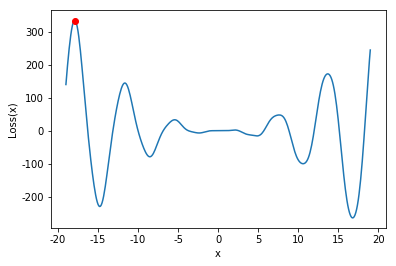

In [248]:
plt.plot(x,Loss(x));
plt.xlabel('x')
plt.ylabel('Loss(x)')

a = round(np.random.uniform(lower,upper),2)  # 取到小數點第二位
print('初始值 =',a)
plt.plot(a,Loss(a),'ro');

## 算出 Loss 的微分

In [249]:
import sympy as sp
def dLoss(X):
    X = sp.Symbol('x')
    return sp.diff((sp.sin(2*(X-2))+X)*sp.cos(X-1)*X,X)     
dLoss(3)

-x*(x + sin(2*x - 4))*sin(x - 1) + x*(2*cos(2*x - 4) + 1)*cos(x - 1) + (x + sin(2*x - 4))*cos(x - 1)

## 定義 Gradient descent

In [250]:
η = 0.0005

def gradient_descent(niter, η):
    
    try_x = a                   
    try_y = Loss(try_x)
    memory_x = []        # x 儲存區
    memory_y = []        # y 儲存區
    
    for i in range(0,niter):
        memory_x.append(try_x)      # 把現在測試的 x 值加到 x 儲存區
        memory_y.append(try_y)      # 把現在測試的 y 值加到 y 儲存區
        try_x = try_x - η*(-try_x*(try_x + np.sin(2*try_x - 4))*np.sin(try_x - 1) + try_x*(2*np.cos(2*try_x - 4) + 1)*np.cos(try_x - 1) + (try_x + np.sin(2*try_x - 4))*np.cos(try_x - 1))       
        try_y = Loss(try_x)
        if not lower <= try_x <= upper:      # 如果檢查到圖的邊界，就停下來
            break
            
    return (memory_x, memory_y)     # 回傳儲存區的內容

A = gradient_descent(1000 , η)     

## 畫出本次測試的過程圖

當 x = -14.7718971682 時，有最小值 -230.276002191


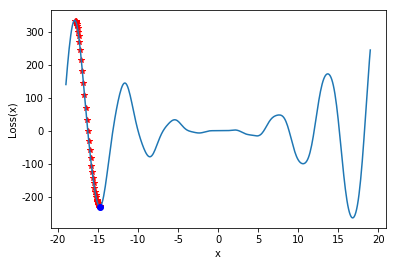

In [251]:
x = np.linspace(lower,upper,N)
plt.plot( A[0], A[1],'r*'     ,    x,Loss(x)   ,    A[0][-1],A[1][-1],'bo' )
          # 每個步驟的結果           # 曲線圖              # 最後得到的結果
plt.xlabel('x')
plt.ylabel('Loss(x)')
print('當 x =',A[0][-1],'時，有最小值',A[1][-1])

紅色星星是每個小步驟得到的點，藍色的點是最後得到的區域最小值

## 接下來要重複以上步驟，試著找出全域最小值

In [282]:
min_Loss_x = A[0][-1]   # 剛剛得到的最適合的 x
min_Loss = A[1][-1]     # 剛剛得到的 Loss(x) 最小值

for i in range(50):               # 連做 50 次測試
    a = np.random.uniform(lower,upper)   # 取隨機數
    A = gradient_descent(1000,η)         # 試找區域最小值
    if min_Loss > A[1][-1]:              # 如果這次得到的最小值比剛剛還小
        min_Loss = A[1][-1]                 # 就更新 min_Loss
        min_Loss_x = A[0][-1]               # 以及 min_Loss_x 
    print('隨機數:',round(a,2),'算出的min是:',min_Loss)    # 印出每次測試的「初始x」,和當前所得的「全域最小值」
print(min_Loss_x,min_Loss)      # 印出最後的 x 和 Loss(x)最小值


隨機數: 9.34 算出的min是: -230.276002191
隨機數: -0.79 算出的min是: -230.276002191
隨機數: 16.44 算出的min是: -264.816664125
隨機數: 17.57 算出的min是: -264.816664125
隨機數: 6.18 算出的min是: -264.816664125
隨機數: -16.36 算出的min是: -264.816664125
隨機數: -13.53 算出的min是: -264.816664125
隨機數: 1.1 算出的min是: -264.816664125
隨機數: -5.64 算出的min是: -264.816664125
隨機數: -7.73 算出的min是: -264.816664125
隨機數: -17.13 算出的min是: -264.816664125
隨機數: -12.78 算出的min是: -264.816664125
隨機數: -16.14 算出的min是: -264.816664125
隨機數: 8.64 算出的min是: -264.816664125
隨機數: -10.86 算出的min是: -264.816664125
隨機數: -4.38 算出的min是: -264.816664125
隨機數: -1.66 算出的min是: -264.816664125
隨機數: -9.05 算出的min是: -264.816664125
隨機數: -13.11 算出的min是: -264.816664125
隨機數: -3.93 算出的min是: -264.816664125
隨機數: 8.05 算出的min是: -264.816664125
隨機數: 2.76 算出的min是: -264.816664125
隨機數: 12.68 算出的min是: -264.816664125
隨機數: -4.15 算出的min是: -264.816664125
隨機數: 15.73 算出的min是: -264.816664125
隨機數: 17.35 算出的min是: -264.816664125
隨機數: 18.98 算出的min是: -264.816664125
隨機數: 4.07 算出的min是: -264.816664125
隨機數: -13.32 算出的min是: 

最小值 -264.816664125 出現在 x = 16.7996570532 時


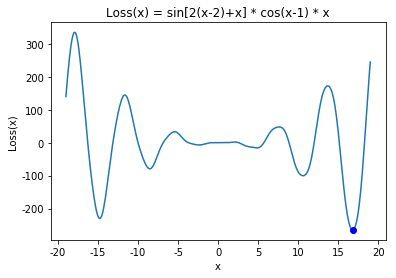

In [288]:
plt.plot(x,Loss(x),min_Loss_x,min_Loss,'bo')  
plt.title('Loss(x) = sin[2(x-2)+x] * cos(x-1) * x')
plt.xlabel('x')
plt.ylabel('Loss(x)')
print('最小值',min_Loss,'出現在 x =',min_Loss_x,'時')